In [1]:
#Import libraries

import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Important paths
#/raid/jfeng2/code_optum_preprocessing/liver_transplant/stat_bfIdx_diag.ipynb

#in_path = '/data2/shared_data/Liver_optum/outputs/'  #97
in_path = '/ctao_shared_data/Liver_optum/outputs/'   #8

ot_path = '../Data_V3/'

## Load Labels File

In [3]:
#  "/data2/shared_data/" on 97 == /ctao_shared_data

#Read Data
df_original = pd.read_csv(in_path + 'label.csv')
df_original.head()

,patid,liver_pt,index_day,Myocardial_Infarction_in5year,atrial_fibrillation_in5year,pulmonary_embolism_in5year,heart_failure_in5year,cardiac_arrest_in5year,stroke_in5year,stroke_index_day,...,heart_failure_index_day,pulmonary_embolism_index_day,atrial_fibrillation_index_day,Myocardial_Infarction_index_day,mixed,first_lowest,second_lowest,yrdob,gdr_cd,age_at_index
0,560499200082764,1,2017-09-07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1998,M,19
1,560499200154057,1,2019-11-04,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1960,M,59
2,560499200186153,1,2016-02-15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1953,F,63
3,560499200217248,1,2019-06-17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1956,F,63
4,560499200413291,1,2017-04-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1966,F,51


In [4]:
print("Total number of patients ", len (df_original)) 

Total number of patients  22522


In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22522 entries, 0 to 22521
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   patid                            22522 non-null  int64 
 1   liver_pt                         22522 non-null  int64 
 2   index_day                        22522 non-null  object
 3   Myocardial_Infarction_in5year    22522 non-null  int64 
 4   atrial_fibrillation_in5year      22522 non-null  int64 
 5   pulmonary_embolism_in5year       22522 non-null  int64 
 6   heart_failure_in5year            22522 non-null  int64 
 7   cardiac_arrest_in5year           22522 non-null  int64 
 8   stroke_in5year                   22522 non-null  int64 
 9   stroke_index_day                 22522 non-null  object
 10  cardiac_arrest_index_day         22522 non-null  object
 11  heart_failure_index_day          22522 non-null  object
 12  pulmonary_embolism_index_day    

# Filtering patients younger than 18 years old

In [6]:
age_filtered= df_original[df_original['age_at_index']>=18]
age_filtered

,patid,liver_pt,index_day,Myocardial_Infarction_in5year,atrial_fibrillation_in5year,pulmonary_embolism_in5year,heart_failure_in5year,cardiac_arrest_in5year,stroke_in5year,stroke_index_day,...,heart_failure_index_day,pulmonary_embolism_index_day,atrial_fibrillation_index_day,Myocardial_Infarction_index_day,mixed,first_lowest,second_lowest,yrdob,gdr_cd,age_at_index
0,560499200082764,1,2017-09-07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1998,M,19
1,560499200154057,1,2019-11-04,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1960,M,59
2,560499200186153,1,2016-02-15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1953,F,63
3,560499200217248,1,2019-06-17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1956,F,63
4,560499200413291,1,2017-04-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1966,F,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22517,560499899985173,1,2008-01-25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1957,F,51
22518,560499899995745,1,2008-03-10,0,0,0,1,0,0,0,...,2008-07-03,0,0,0,1,2008-07-03 00:00:00,0,1952,M,56
22519,560499899996163,1,2007-04-18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1953,F,54
22520,560499899996464,1,2020-03-06,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1979,M,41


In [7]:
print("Total number of patients >= 18: ", len (age_filtered))

Total number of patients >= 18:  21424


In [8]:
cl = ['patid', 'index_day', 'stroke_index_day', 'cardiac_arrest_index_day', 'heart_failure_index_day', 'pulmonary_embolism_index_day', 'atrial_fibrillation_index_day',
       'Myocardial_Infarction_index_day', 'mixed','first_lowest','yrdob', 'gdr_cd' , 'age_at_index']
age_filtered = age_filtered[cl]
age_filtered.gdr_cd.value_counts()

M    13148
F     8268
U        8
Name: gdr_cd, dtype: int64

In [9]:
age_filtered = age_filtered[(age_filtered['gdr_cd'] == 'M') | (age_filtered['gdr_cd'] == 'F')]
age_filtered 

,patid,index_day,stroke_index_day,cardiac_arrest_index_day,heart_failure_index_day,pulmonary_embolism_index_day,atrial_fibrillation_index_day,Myocardial_Infarction_index_day,mixed,first_lowest,yrdob,gdr_cd,age_at_index
0,560499200082764,2017-09-07,0,0,0,0,0,0,0,0,1998,M,19
1,560499200154057,2019-11-04,0,0,0,0,0,0,0,0,1960,M,59
2,560499200186153,2016-02-15,0,0,0,0,0,0,0,0,1953,F,63
3,560499200217248,2019-06-17,0,0,0,0,0,0,0,0,1956,F,63
4,560499200413291,2017-04-01,0,0,0,0,0,0,0,0,1966,F,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22517,560499899985173,2008-01-25,0,0,0,0,0,0,0,0,1957,F,51
22518,560499899995745,2008-03-10,0,0,2008-07-03,0,0,0,1,2008-07-03 00:00:00,1952,M,56
22519,560499899996163,2007-04-18,0,0,0,0,0,0,0,0,1953,F,54
22520,560499899996464,2020-03-06,0,0,0,0,0,0,0,0,1979,M,41


In [10]:
age_filtered .sort_values(by='index_day')

,patid,index_day,stroke_index_day,cardiac_arrest_index_day,heart_failure_index_day,pulmonary_embolism_index_day,atrial_fibrillation_index_day,Myocardial_Infarction_index_day,mixed,first_lowest,yrdob,gdr_cd,age_at_index
19213,560499886148119,2007-01-01,0,0,2007-01-01,2008-05-09,0,2009-03-24,3,2007-01-01 00:00:00,1947,M,60
16067,560499844389959,2007-01-01,0,0,2009-05-19,0,0,0,1,2009-05-19 00:00:00,1966,M,41
19241,560499886251162,2007-01-01,0,0,0,0,0,0,0,0,1956,M,51
14118,560499827666182,2007-01-01,0,0,0,0,0,0,0,0,1968,M,39
19475,560499887186731,2007-01-01,0,0,0,0,0,0,0,0,1960,M,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20506,560499892710833,2020-03-28,0,0,0,0,0,0,0,0,1950,M,70
2752,560499257676611,2020-03-28,0,0,0,0,0,0,0,0,1944,M,76
7653,560499499933989,2020-03-30,0,0,0,0,0,0,0,0,1953,M,67
5061,560499288607561,2020-03-30,0,0,2020-03-30,0,0,0,1,2020-03-30 00:00:00,1962,F,58


In [11]:
# 7223 patients has at least on of the MACE
has_MACE = age_filtered[age_filtered.mixed >= 1]
has_MACE

,patid,index_day,stroke_index_day,cardiac_arrest_index_day,heart_failure_index_day,pulmonary_embolism_index_day,atrial_fibrillation_index_day,Myocardial_Infarction_index_day,mixed,first_lowest,yrdob,gdr_cd,age_at_index
5,560499200565977,2016-01-11,0,0,0,0,2016-03-03,0,1,2016-03-03 00:00:00,1953,F,63
8,560499200668346,2018-10-15,0,0,2019-09-25,0,0,0,1,2019-09-25 00:00:00,1948,M,70
9,560499200712017,2017-01-10,0,0,0,0,2017-05-08,0,1,2017-05-08 00:00:00,1942,M,75
10,560499200734235,2017-02-14,0,0,0,2017-03-11,0,0,1,2017-03-11 00:00:00,1964,M,53
18,560499201409845,2019-02-11,0,0,2019-02-14,2019-03-25,0,2019-02-11,3,2019-02-11 00:00:00,1939,F,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22514,560499899972928,2007-11-15,0,0,2012-01-13,0,0,0,1,2012-01-13 00:00:00,1950,F,57
22515,560499899979680,2014-12-24,0,0,2017-08-31,2015-02-23,0,0,2,2015-02-23 00:00:00,1953,M,61
22516,560499899980759,2018-05-07,0,0,2018-06-08,0,0,0,1,2018-06-08 00:00:00,1956,M,62
22518,560499899995745,2008-03-10,0,0,2008-07-03,0,0,0,1,2008-07-03 00:00:00,1952,M,56


# Add Gap between index and MACE date

# Patient with no MACE will have this gap < 0

In [12]:
#test = age_filtered.copy()
mace_date = []
for i in age_filtered.first_lowest:
    if i == '0':
        mace_date.append(pd.to_datetime(20000101, format='%Y%m%d'))
    else:
        mace_date.append(i)
age_filtered['event_date'] = mace_date

age_filtered['index_MACE_gap'] = (pd.to_datetime(age_filtered['event_date'])- pd.to_datetime(age_filtered['index_day'])).dt.days
#age_filtered = age_filtered[age_filtered.mixed >= 1]
age_filtered

/tmp/ipykernel_813352/1727715131.py:8: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  age_filtered['event_date'] = mace_date


,patid,index_day,stroke_index_day,cardiac_arrest_index_day,heart_failure_index_day,pulmonary_embolism_index_day,atrial_fibrillation_index_day,Myocardial_Infarction_index_day,mixed,first_lowest,yrdob,gdr_cd,age_at_index,event_date,index_MACE_gap
0,560499200082764,2017-09-07,0,0,0,0,0,0,0,0,1998,M,19,2000-01-01,-6459
1,560499200154057,2019-11-04,0,0,0,0,0,0,0,0,1960,M,59,2000-01-01,-7247
2,560499200186153,2016-02-15,0,0,0,0,0,0,0,0,1953,F,63,2000-01-01,-5889
3,560499200217248,2019-06-17,0,0,0,0,0,0,0,0,1956,F,63,2000-01-01,-7107
4,560499200413291,2017-04-01,0,0,0,0,0,0,0,0,1966,F,51,2000-01-01,-6300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22517,560499899985173,2008-01-25,0,0,0,0,0,0,0,0,1957,F,51,2000-01-01,-2946
22518,560499899995745,2008-03-10,0,0,2008-07-03,0,0,0,1,2008-07-03 00:00:00,1952,M,56,2008-07-03,115
22519,560499899996163,2007-04-18,0,0,0,0,0,0,0,0,1953,F,54,2000-01-01,-2664
22520,560499899996464,2020-03-06,0,0,0,0,0,0,0,0,1979,M,41,2000-01-01,-7370


In [13]:
age_filtered['index_MACE_gap'].max()

1824

In [14]:
#age_filtered['0-30-label'] = np.where((age_filtered['index_MACE_gap'] <=30) & (age_filtered['index_MACE_gap'] >=0), 1,0)

#age_filtered['0-30-label'] = np.where((age_filtered['index_MACE_gap'] ==0), 1,0)
age_filtered['0-30-label'] = np.where((age_filtered['index_MACE_gap'] <=30) & (age_filtered['index_MACE_gap'] >=0), 1,0)
age_filtered['0-365-label'] = np.where((age_filtered['index_MACE_gap'] <=365) & (age_filtered['index_MACE_gap']>=0), 1,0)
age_filtered['0-1095-label'] = np.where((age_filtered['index_MACE_gap'] <=1095) & (age_filtered['index_MACE_gap']>=0), 1,0)
age_filtered['0-1825-label'] = np.where((age_filtered['index_MACE_gap'] <=1825) & (age_filtered['index_MACE_gap']>=0), 1,0)


#age_filtered['31-180-label'] = np.where((age_filtered['index_MACE_gap'] <=180) & (age_filtered['index_MACE_gap']>=31), 1,0)
#age_filtered['181-365-label'] = np.where((age_filtered['index_MACE_gap'] <=365) & (age_filtered['index_MACE_gap']>=181), 1,0)
#print(test['0-30-label'].value_counts())

#test['31-180-label'] = np.where( (test['index_MACE_gap'] <=180) & (test['index_MACE_gap']>=31), 1,0)
# test
# print(test['31-180-label'].value_counts())

# test['181-365-label'] = np.where((test['index_MACE_gap'] <=365) & (test['index_MACE_gap']>=181), 1,0)
# print(test['181-365-label'].value_counts())

# test['0-365-label'] = np.where((test['index_MACE_gap'] <=365) & (test['index_MACE_gap']>=0), 1,0)
# print(test['0-365-label'].value_counts())

#cl = ['encounter_id', 'patid', 'fst_dt' , 'index_day', 'mixed', 'yrdob', 'gdr_cd' , 'event_date',  'day_gap']
#patients_encounters  = patients_encounters [cl]

#age_filtered ['30-label'] = np.where((age_filtered['mixed'] == 1) & (age_filtered['index_MACE_gap'] <=30), 1,0)
#age_filtered.

In [15]:
#print(age_filtered[age_filtered['0-label'] == 1]['patid'].count())
print(age_filtered[age_filtered['0-30-label'] == 1]['patid'].count())
#print(age_filtered[age_filtered['31-180-label'] == 1]['patid'].count())
#print(age_filtered[age_filtered['181-365-label'] == 1]['patid'].count())
print(age_filtered[age_filtered['0-365-label'] == 1]['patid'].count())
print(age_filtered[age_filtered['0-1095-label'] == 1]['patid'].count())
print(age_filtered[age_filtered['0-1825-label'] == 1]['patid'].count())
#print(age_filtered[age_filtered['366-1825-label'] == 1]['patid'].count())

2805
5471
6761
7217


# Merging labeled patients with Encounters

In [16]:
#Load encounter dictionary
enc_dic = pd.read_csv(ot_path+ "dict_encounter.csv")
enc_dic

,encounter_id,patid,fst_dt
0,560499200082764_2017-06-13,560499200082764,2017-06-13
1,560499200082764_2017-07-14,560499200082764,2017-07-14
2,560499200082764_2017-08-22,560499200082764,2017-08-22
3,560499200082764_2017-09-07,560499200082764,2017-09-07
4,560499200082764_2017-09-26,560499200082764,2017-09-26
...,...,...,...
5771662,560499899999890_2015-02-06,560499899999890,2015-02-06
5771663,560499899999890_2015-02-07,560499899999890,2015-02-07
5771664,560499899999890_2015-02-09,560499899999890,2015-02-09
5771665,560499899999890_2015-02-10,560499899999890,2015-02-10


In [18]:
#enc_dic.isnull().values.any()

#patients_encounters[patients_encounters['day_gap'].isna()]

In [17]:
# The only way that worked for merging two dataframes one-to-many
patients_encounters_test = enc_dic.merge(age_filtered[['patid','index_day','stroke_index_day', 'cardiac_arrest_index_day', 'heart_failure_index_day', 'pulmonary_embolism_index_day', 'atrial_fibrillation_index_day',
       'Myocardial_Infarction_index_day', 'mixed','first_lowest','yrdob', 'gdr_cd', 'age_at_index', 'event_date', 'index_MACE_gap',
                       '0-30-label', '0-365-label','0-1095-label',  '0-1825-label']], on='patid', how='left')

# 'patid', 'index_day', 'stroke_index_day', 'cardiac_arrest_index_day', 'heart_failure_index_day', 'pulmonary_embolism_index_day', 'atrial_fibrillation_index_day',
#        'Myocardial_Infarction_index_day', 'mixed','first_lowest','yrdob', 'gdr_cd' , 'age_at_index'
#patients_encounters_test = enc_dic.merge(age_filtered, on='patid', how='left')
#patients_encounters 

In [18]:
patients_encounters_test
patients_encounters_test.isnull().values.any()
patients_encounters_test = patients_encounters_test.dropna()
patients_encounters_test

,encounter_id,patid,fst_dt,index_day,stroke_index_day,cardiac_arrest_index_day,heart_failure_index_day,pulmonary_embolism_index_day,atrial_fibrillation_index_day,Myocardial_Infarction_index_day,...,first_lowest,yrdob,gdr_cd,age_at_index,event_date,index_MACE_gap,0-30-label,0-365-label,0-1095-label,0-1825-label
0,560499200082764_2017-06-13,560499200082764,2017-06-13,2017-09-07,0,0,0,0,0,0,...,0,1998.0,M,19.0,2000-01-01,-6459.0,0.0,0.0,0.0,0.0
1,560499200082764_2017-07-14,560499200082764,2017-07-14,2017-09-07,0,0,0,0,0,0,...,0,1998.0,M,19.0,2000-01-01,-6459.0,0.0,0.0,0.0,0.0
2,560499200082764_2017-08-22,560499200082764,2017-08-22,2017-09-07,0,0,0,0,0,0,...,0,1998.0,M,19.0,2000-01-01,-6459.0,0.0,0.0,0.0,0.0
3,560499200082764_2017-09-07,560499200082764,2017-09-07,2017-09-07,0,0,0,0,0,0,...,0,1998.0,M,19.0,2000-01-01,-6459.0,0.0,0.0,0.0,0.0
4,560499200082764_2017-09-26,560499200082764,2017-09-26,2017-09-07,0,0,0,0,0,0,...,0,1998.0,M,19.0,2000-01-01,-6459.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5771662,560499899999890_2015-02-06,560499899999890,2015-02-06,2008-06-11,0,0,0,2010-05-29,0,0,...,2010-05-29 00:00:00,1945.0,M,63.0,2010-05-29,717.0,0.0,0.0,1.0,1.0
5771663,560499899999890_2015-02-07,560499899999890,2015-02-07,2008-06-11,0,0,0,2010-05-29,0,0,...,2010-05-29 00:00:00,1945.0,M,63.0,2010-05-29,717.0,0.0,0.0,1.0,1.0
5771664,560499899999890_2015-02-09,560499899999890,2015-02-09,2008-06-11,0,0,0,2010-05-29,0,0,...,2010-05-29 00:00:00,1945.0,M,63.0,2010-05-29,717.0,0.0,0.0,1.0,1.0
5771665,560499899999890_2015-02-10,560499899999890,2015-02-10,2008-06-11,0,0,0,2010-05-29,0,0,...,2010-05-29 00:00:00,1945.0,M,63.0,2010-05-29,717.0,0.0,0.0,1.0,1.0


In [19]:
patients_encounters_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4968162 entries, 0 to 5771666
Data columns (total 21 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   encounter_id                     object        
 1   patid                            int64         
 2   fst_dt                           object        
 3   index_day                        object        
 4   stroke_index_day                 object        
 5   cardiac_arrest_index_day         object        
 6   heart_failure_index_day          object        
 7   pulmonary_embolism_index_day     object        
 8   atrial_fibrillation_index_day    object        
 9   Myocardial_Infarction_index_day  object        
 10  mixed                            float64       
 11  first_lowest                     object        
 12  yrdob                            float64       
 13  gdr_cd                           object        
 14  age_at_index                     f

In [20]:
patients_encounters = enc_dic.merge(age_filtered)
patients_encounters

,encounter_id,patid,fst_dt,index_day,stroke_index_day,cardiac_arrest_index_day,heart_failure_index_day,pulmonary_embolism_index_day,atrial_fibrillation_index_day,Myocardial_Infarction_index_day,...,first_lowest,yrdob,gdr_cd,age_at_index,event_date,index_MACE_gap,0-30-label,0-365-label,0-1095-label,0-1825-label
0,560499200082764_2017-06-13,560499200082764,2017-06-13,2017-09-07,0,0,0,0,0,0,...,0,1998,M,19,2000-01-01,-6459,0,0,0,0
1,560499200082764_2017-07-14,560499200082764,2017-07-14,2017-09-07,0,0,0,0,0,0,...,0,1998,M,19,2000-01-01,-6459,0,0,0,0
2,560499200082764_2017-08-22,560499200082764,2017-08-22,2017-09-07,0,0,0,0,0,0,...,0,1998,M,19,2000-01-01,-6459,0,0,0,0
3,560499200082764_2017-09-07,560499200082764,2017-09-07,2017-09-07,0,0,0,0,0,0,...,0,1998,M,19,2000-01-01,-6459,0,0,0,0
4,560499200082764_2017-09-26,560499200082764,2017-09-26,2017-09-07,0,0,0,0,0,0,...,0,1998,M,19,2000-01-01,-6459,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968157,560499899999890_2015-02-06,560499899999890,2015-02-06,2008-06-11,0,0,0,2010-05-29,0,0,...,2010-05-29 00:00:00,1945,M,63,2010-05-29,717,0,0,1,1
4968158,560499899999890_2015-02-07,560499899999890,2015-02-07,2008-06-11,0,0,0,2010-05-29,0,0,...,2010-05-29 00:00:00,1945,M,63,2010-05-29,717,0,0,1,1
4968159,560499899999890_2015-02-09,560499899999890,2015-02-09,2008-06-11,0,0,0,2010-05-29,0,0,...,2010-05-29 00:00:00,1945,M,63,2010-05-29,717,0,0,1,1
4968160,560499899999890_2015-02-10,560499899999890,2015-02-10,2008-06-11,0,0,0,2010-05-29,0,0,...,2010-05-29 00:00:00,1945,M,63,2010-05-29,717,0,0,1,1


In [21]:
#patients_encounters == patients_encounters_test
patients_encounters.info()
#patients_encounters.equals(patients_encounters_test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4968162 entries, 0 to 4968161
Data columns (total 21 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   encounter_id                     object        
 1   patid                            int64         
 2   fst_dt                           object        
 3   index_day                        object        
 4   stroke_index_day                 object        
 5   cardiac_arrest_index_day         object        
 6   heart_failure_index_day          object        
 7   pulmonary_embolism_index_day     object        
 8   atrial_fibrillation_index_day    object        
 9   Myocardial_Infarction_index_day  object        
 10  mixed                            int64         
 11  first_lowest                     object        
 12  yrdob                            int64         
 13  gdr_cd                           object        
 14  age_at_index                     i

In [24]:
#enc_dic.merge(age_filtered) not working
#patients_encounters.isnull().values.any()

In [25]:
#patients_encounters[patients_encounters.patid == 560499200565977]

In [26]:
# x = patients_encounters[patients_encounters.stroke_index_day!='0']
# x

In [22]:
df = patients_encounters.copy()
df['stroke_label'] = np.where((df['stroke_index_day'] != '0') & (df['stroke_index_day'] <= df['fst_dt']), 1,0)
df['cardiac_arrest_label'] = np.where((df['cardiac_arrest_index_day'] != '0') & (df['cardiac_arrest_index_day'] <= df['fst_dt']), 1,0)
df['heart_failure_label'] = np.where((df['heart_failure_index_day'] != '0') & (df['heart_failure_index_day'] <= df['fst_dt']), 1,0)
df['pulmonary_embolism_label'] = np.where((df['pulmonary_embolism_index_day'] != '0') & (df['pulmonary_embolism_index_day'] <= df['fst_dt']), 1,0)
df['atrial_fibrillation_label'] = np.where((df['atrial_fibrillation_index_day'] != '0') & (df['atrial_fibrillation_index_day'] <= df['fst_dt']), 1,0)
df['Myocardial_Infarction_label'] = np.where((df['Myocardial_Infarction_index_day'] != '0') & (df['Myocardial_Infarction_index_day'] <= df['fst_dt']), 1,0)
cl = ['encounter_id', 'patid', 'fst_dt', 'index_day', 'stroke_label', 'cardiac_arrest_label', 'heart_failure_label', 
      'pulmonary_embolism_label', 'atrial_fibrillation_label',
       'Myocardial_Infarction_label', 'mixed','first_lowest','yrdob', 'gdr_cd' , 'age_at_index',
       '0-30-label', '0-365-label','0-1095-label',  '0-1825-label']
df = df[cl]
df

,encounter_id,patid,fst_dt,index_day,stroke_label,cardiac_arrest_label,heart_failure_label,pulmonary_embolism_label,atrial_fibrillation_label,Myocardial_Infarction_label,mixed,first_lowest,yrdob,gdr_cd,age_at_index,0-30-label,0-365-label,0-1095-label,0-1825-label
0,560499200082764_2017-06-13,560499200082764,2017-06-13,2017-09-07,0,0,0,0,0,0,0,0,1998,M,19,0,0,0,0
1,560499200082764_2017-07-14,560499200082764,2017-07-14,2017-09-07,0,0,0,0,0,0,0,0,1998,M,19,0,0,0,0
2,560499200082764_2017-08-22,560499200082764,2017-08-22,2017-09-07,0,0,0,0,0,0,0,0,1998,M,19,0,0,0,0
3,560499200082764_2017-09-07,560499200082764,2017-09-07,2017-09-07,0,0,0,0,0,0,0,0,1998,M,19,0,0,0,0
4,560499200082764_2017-09-26,560499200082764,2017-09-26,2017-09-07,0,0,0,0,0,0,0,0,1998,M,19,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968157,560499899999890_2015-02-06,560499899999890,2015-02-06,2008-06-11,0,0,0,1,0,0,1,2010-05-29 00:00:00,1945,M,63,0,0,1,1
4968158,560499899999890_2015-02-07,560499899999890,2015-02-07,2008-06-11,0,0,0,1,0,0,1,2010-05-29 00:00:00,1945,M,63,0,0,1,1
4968159,560499899999890_2015-02-09,560499899999890,2015-02-09,2008-06-11,0,0,0,1,0,0,1,2010-05-29 00:00:00,1945,M,63,0,0,1,1
4968160,560499899999890_2015-02-10,560499899999890,2015-02-10,2008-06-11,0,0,0,1,0,0,1,2010-05-29 00:00:00,1945,M,63,0,0,1,1


In [23]:
patients_encounters = df.copy()

In [29]:
#patients_encounters[patients_encounters.patid == 560499200565977]

In [30]:
# #df = patients_encounters.copy()
# xx = df[df.stroke_index_day_label!=0]
# xx = df[(df.stroke_index_day_label == 0) &(df.cardiac_arrest_index_day_label == 0) & (df.heart_failure_index_day_label == 0) & 
#         (df.pulmonary_embolism_index_day_label == 0) & (df.atrial_fibrillation_index_day_label == 0) & (df.Myocardial_Infarction_index_day_label == 0) & (df.mixed == 1) ]
# # #xx = df[df.mixed == 0]
# xx

## Adding Day Gap for each encounter

In [24]:
patients_encounters ['day_gap'] = (pd.to_datetime(patients_encounters ['fst_dt'])- pd.to_datetime(patients_encounters ['index_day'])).dt.days
#cl = ['encounter_id', 'patid', 'fst_dt' , 'index_day', 'mixed', 'yrdob', 'gdr_cd' , 'event_date',  'day_gap']
#patients_encounters  = patients_encounters [cl]

## Adding age at each encounter

In [25]:
#patients_encounters['age_in_years'] = pd.to_datetime(patients_encounters['index_day']).dt.year-patients_encounters['yrdob']
patients_encounters['age_at_encounter'] = pd.to_datetime(patients_encounters['fst_dt']).dt.year-patients_encounters['yrdob']
patients_encounters
#dx_mg['yrBfIdxDay'] = pd.to_datetime(dx_mg['index_day']).dt.year-pd.to_datetime(dx_mg['fst_dt']).dt.year

,encounter_id,patid,fst_dt,index_day,stroke_label,cardiac_arrest_label,heart_failure_label,pulmonary_embolism_label,atrial_fibrillation_label,Myocardial_Infarction_label,...,first_lowest,yrdob,gdr_cd,age_at_index,0-30-label,0-365-label,0-1095-label,0-1825-label,day_gap,age_at_encounter
0,560499200082764_2017-06-13,560499200082764,2017-06-13,2017-09-07,0,0,0,0,0,0,...,0,1998,M,19,0,0,0,0,-86,19
1,560499200082764_2017-07-14,560499200082764,2017-07-14,2017-09-07,0,0,0,0,0,0,...,0,1998,M,19,0,0,0,0,-55,19
2,560499200082764_2017-08-22,560499200082764,2017-08-22,2017-09-07,0,0,0,0,0,0,...,0,1998,M,19,0,0,0,0,-16,19
3,560499200082764_2017-09-07,560499200082764,2017-09-07,2017-09-07,0,0,0,0,0,0,...,0,1998,M,19,0,0,0,0,0,19
4,560499200082764_2017-09-26,560499200082764,2017-09-26,2017-09-07,0,0,0,0,0,0,...,0,1998,M,19,0,0,0,0,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968157,560499899999890_2015-02-06,560499899999890,2015-02-06,2008-06-11,0,0,0,1,0,0,...,2010-05-29 00:00:00,1945,M,63,0,0,1,1,2431,70
4968158,560499899999890_2015-02-07,560499899999890,2015-02-07,2008-06-11,0,0,0,1,0,0,...,2010-05-29 00:00:00,1945,M,63,0,0,1,1,2432,70
4968159,560499899999890_2015-02-09,560499899999890,2015-02-09,2008-06-11,0,0,0,1,0,0,...,2010-05-29 00:00:00,1945,M,63,0,0,1,1,2434,70
4968160,560499899999890_2015-02-10,560499899999890,2015-02-10,2008-06-11,0,0,0,1,0,0,...,2010-05-29 00:00:00,1945,M,63,0,0,1,1,2435,70


## Total number of encounters  (identified by patient_id and visit first date

In [26]:
len(patients_encounters[patients_encounters['patid']==560499829592146])

3368

In [27]:
patients_encounters[patients_encounters['patid']==560499829592146]
patients_encounters[patients_encounters['encounter_id']=='560499829592146_2010-02-08']

,encounter_id,patid,fst_dt,index_day,stroke_label,cardiac_arrest_label,heart_failure_label,pulmonary_embolism_label,atrial_fibrillation_label,Myocardial_Infarction_label,...,first_lowest,yrdob,gdr_cd,age_at_index,0-30-label,0-365-label,0-1095-label,0-1825-label,day_gap,age_at_encounter
2864506,560499829592146_2010-02-08,560499829592146,2010-02-08,2013-02-12,0,0,0,0,0,0,...,0,1962,F,51,0,0,0,0,-1100,48


In [28]:
patients_encounters[patients_encounters['patid']==560499200082764]

,encounter_id,patid,fst_dt,index_day,stroke_label,cardiac_arrest_label,heart_failure_label,pulmonary_embolism_label,atrial_fibrillation_label,Myocardial_Infarction_label,...,first_lowest,yrdob,gdr_cd,age_at_index,0-30-label,0-365-label,0-1095-label,0-1825-label,day_gap,age_at_encounter
0,560499200082764_2017-06-13,560499200082764,2017-06-13,2017-09-07,0,0,0,0,0,0,...,0,1998,M,19,0,0,0,0,-86,19
1,560499200082764_2017-07-14,560499200082764,2017-07-14,2017-09-07,0,0,0,0,0,0,...,0,1998,M,19,0,0,0,0,-55,19
2,560499200082764_2017-08-22,560499200082764,2017-08-22,2017-09-07,0,0,0,0,0,0,...,0,1998,M,19,0,0,0,0,-16,19
3,560499200082764_2017-09-07,560499200082764,2017-09-07,2017-09-07,0,0,0,0,0,0,...,0,1998,M,19,0,0,0,0,0,19
4,560499200082764_2017-09-26,560499200082764,2017-09-26,2017-09-07,0,0,0,0,0,0,...,0,1998,M,19,0,0,0,0,19,19
5,560499200082764_2017-10-26,560499200082764,2017-10-26,2017-09-07,0,0,0,0,0,0,...,0,1998,M,19,0,0,0,0,49,19
6,560499200082764_2017-12-12,560499200082764,2017-12-12,2017-09-07,0,0,0,0,0,0,...,0,1998,M,19,0,0,0,0,96,19
7,560499200082764_2017-12-21,560499200082764,2017-12-21,2017-09-07,0,0,0,0,0,0,...,0,1998,M,19,0,0,0,0,105,19


In [36]:
#patients_encounters.to_csv(ot_path+"patients_encounters.csv", index=False)

## Identify range of 	fst_dt

In [29]:
patients_encounters.sort_values(by='fst_dt')

,encounter_id,patid,fst_dt,index_day,stroke_label,cardiac_arrest_label,heart_failure_label,pulmonary_embolism_label,atrial_fibrillation_label,Myocardial_Infarction_label,...,first_lowest,yrdob,gdr_cd,age_at_index,0-30-label,0-365-label,0-1095-label,0-1825-label,day_gap,age_at_encounter
3451118,560499847780723_2007-01-01,560499847780723,2007-01-01,2020-03-05,0,0,0,0,0,0,...,2020-03-27 00:00:00,1947,M,73,1,1,1,1,-4812,60
2372253,560499822359580_2007-01-01,560499822359580,2007-01-01,2007-01-18,0,0,0,0,0,0,...,0,1937,F,70,0,0,0,0,-17,70
3505005,560499849002195_2007-01-01,560499849002195,2007-01-01,2007-07-19,0,0,0,0,0,0,...,2007-07-31 00:00:00,1952,M,55,1,1,1,1,-199,55
2738015,560499827666182_2007-01-01,560499827666182,2007-01-01,2007-01-01,0,0,0,0,0,0,...,0,1968,M,39,0,0,0,0,0,39
2253279,560499820506056_2007-01-01,560499820506056,2007-01-01,2007-02-06,0,0,0,0,0,0,...,2007-11-23 00:00:00,1967,F,40,0,1,1,1,-36,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526516,560499270020028_2020-03-31,560499270020028,2020-03-31,2015-03-20,0,0,0,0,0,0,...,0,1968,M,47,0,0,0,0,1838,52
1000113,560499424836208_2020-03-31,560499424836208,2020-03-31,2018-06-20,0,0,1,0,1,0,...,2018-10-05 00:00:00,1985,M,33,0,1,1,1,650,35
978594,560499422838002_2020-03-31,560499422838002,2020-03-31,2020-03-17,0,0,1,0,0,0,...,2020-03-17 00:00:00,1947,F,73,1,1,1,1,14,73
965155,560499420065314_2020-03-31,560499420065314,2020-03-31,2018-01-27,0,0,1,0,0,0,...,2019-05-07 00:00:00,1976,M,42,0,0,1,1,794,44


# Determine final number of patients

In [30]:
#patients_encounters_filtered = patients_encounters[(patients_encounters["fst_dt"] < patients_encounters["index_day"]) & (patients_encounters["day_gap"] >=-1095)]#  & (patients_encounters["day_gap"] <0)]

patients_encounters_filtered = patients_encounters[ (patients_encounters["day_gap"] >=-1095)  & (patients_encounters["day_gap"] <0)]

In [31]:
num_p = patients_encounters_filtered.patid.nunique()
num_p

18304

In [32]:
u_p_list = patients_encounters_filtered.patid.unique()
len(u_p_list)

18304

In [33]:
final_cohort = age_filtered[age_filtered['patid'].isin(u_p_list)]
final_cohort.mixed.value_counts()

0    11843
1     3579
2     1764
3      760
4      286
5       62
6       10
Name: mixed, dtype: int64

In [34]:
final_cohort

,patid,index_day,stroke_index_day,cardiac_arrest_index_day,heart_failure_index_day,pulmonary_embolism_index_day,atrial_fibrillation_index_day,Myocardial_Infarction_index_day,mixed,first_lowest,yrdob,gdr_cd,age_at_index,event_date,index_MACE_gap,0-30-label,0-365-label,0-1095-label,0-1825-label
0,560499200082764,2017-09-07,0,0,0,0,0,0,0,0,1998,M,19,2000-01-01,-6459,0,0,0,0
1,560499200154057,2019-11-04,0,0,0,0,0,0,0,0,1960,M,59,2000-01-01,-7247,0,0,0,0
2,560499200186153,2016-02-15,0,0,0,0,0,0,0,0,1953,F,63,2000-01-01,-5889,0,0,0,0
3,560499200217248,2019-06-17,0,0,0,0,0,0,0,0,1956,F,63,2000-01-01,-7107,0,0,0,0
4,560499200413291,2017-04-01,0,0,0,0,0,0,0,0,1966,F,51,2000-01-01,-6300,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22517,560499899985173,2008-01-25,0,0,0,0,0,0,0,0,1957,F,51,2000-01-01,-2946,0,0,0,0
22518,560499899995745,2008-03-10,0,0,2008-07-03,0,0,0,1,2008-07-03 00:00:00,1952,M,56,2008-07-03,115,0,1,1,1
22519,560499899996163,2007-04-18,0,0,0,0,0,0,0,0,1953,F,54,2000-01-01,-2664,0,0,0,0
22520,560499899996464,2020-03-06,0,0,0,0,0,0,0,0,1979,M,41,2000-01-01,-7370,0,0,0,0


# Save Final List of patients in .pkl file

In [43]:
import pickle
with open(in_path + 'p_list.pkl', 'wb') as f:
    pickle.dump(u_p_list.tolist(), f)

In [44]:
with open(in_path + 'p_list.pkl', 'rb') as f2:
    mynewlist = pickle.load(f2)
    
#mynewlist

In [35]:
final_patients = age_filtered[age_filtered['patid'].isin(u_p_list)]
final_patients 

,patid,index_day,stroke_index_day,cardiac_arrest_index_day,heart_failure_index_day,pulmonary_embolism_index_day,atrial_fibrillation_index_day,Myocardial_Infarction_index_day,mixed,first_lowest,yrdob,gdr_cd,age_at_index,event_date,index_MACE_gap,0-30-label,0-365-label,0-1095-label,0-1825-label
0,560499200082764,2017-09-07,0,0,0,0,0,0,0,0,1998,M,19,2000-01-01,-6459,0,0,0,0
1,560499200154057,2019-11-04,0,0,0,0,0,0,0,0,1960,M,59,2000-01-01,-7247,0,0,0,0
2,560499200186153,2016-02-15,0,0,0,0,0,0,0,0,1953,F,63,2000-01-01,-5889,0,0,0,0
3,560499200217248,2019-06-17,0,0,0,0,0,0,0,0,1956,F,63,2000-01-01,-7107,0,0,0,0
4,560499200413291,2017-04-01,0,0,0,0,0,0,0,0,1966,F,51,2000-01-01,-6300,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22517,560499899985173,2008-01-25,0,0,0,0,0,0,0,0,1957,F,51,2000-01-01,-2946,0,0,0,0
22518,560499899995745,2008-03-10,0,0,2008-07-03,0,0,0,1,2008-07-03 00:00:00,1952,M,56,2008-07-03,115,0,1,1,1
22519,560499899996163,2007-04-18,0,0,0,0,0,0,0,0,1953,F,54,2000-01-01,-2664,0,0,0,0
22520,560499899996464,2020-03-06,0,0,0,0,0,0,0,0,1979,M,41,2000-01-01,-7370,0,0,0,0


# Some statistics about the cohort patients

In [36]:
final_patients .gdr_cd.value_counts()

M    11146
F     7158
Name: gdr_cd, dtype: int64

In [37]:
print(final_patients.age_at_index.mean())

57.39920236013986


In [38]:
print(final_patients.age_at_index.std())

12.76658264063198


# MACE Statistics

In [39]:
df_final = df_original[df_original['patid'].isin(u_p_list)]
df_final

,patid,liver_pt,index_day,Myocardial_Infarction_in5year,atrial_fibrillation_in5year,pulmonary_embolism_in5year,heart_failure_in5year,cardiac_arrest_in5year,stroke_in5year,stroke_index_day,...,heart_failure_index_day,pulmonary_embolism_index_day,atrial_fibrillation_index_day,Myocardial_Infarction_index_day,mixed,first_lowest,second_lowest,yrdob,gdr_cd,age_at_index
0,560499200082764,1,2017-09-07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1998,M,19
1,560499200154057,1,2019-11-04,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1960,M,59
2,560499200186153,1,2016-02-15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1953,F,63
3,560499200217248,1,2019-06-17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1956,F,63
4,560499200413291,1,2017-04-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1966,F,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22517,560499899985173,1,2008-01-25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1957,F,51
22518,560499899995745,1,2008-03-10,0,0,0,1,0,0,0,...,2008-07-03,0,0,0,1,2008-07-03 00:00:00,0,1952,M,56
22519,560499899996163,1,2007-04-18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1953,F,54
22520,560499899996464,1,2020-03-06,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1979,M,41


In [40]:
col = ['Myocardial_Infarction_in5year','atrial_fibrillation_in5year','pulmonary_embolism_in5year','heart_failure_in5year','cardiac_arrest_in5year','stroke_in5year']
subset = df_final[col]
subset

,Myocardial_Infarction_in5year,atrial_fibrillation_in5year,pulmonary_embolism_in5year,heart_failure_in5year,cardiac_arrest_in5year,stroke_in5year
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
22517,0,0,0,0,0,0
22518,0,0,0,1,0,0
22519,0,0,0,0,0,0
22520,0,0,0,0,0,0


In [41]:

subset =subset.rename(columns={'Myocardial_Infarction_in5year': 'Myocardial Infarction', 
                            'atrial_fibrillation_in5year': 'Atrial Fibrillation',
                            'pulmonary_embolism_in5year': 'Pulmonary Embolism',
                            'heart_failure_in5year': 'Heart Failure',
                            'cardiac_arrest_in5year': 'Cardiac Arrest',
                            'stroke_in5year': 'Stroke'})
subset

,Myocardial Infarction,Atrial Fibrillation,Pulmonary Embolism,Heart Failure,Cardiac Arrest,Stroke
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
22517,0,0,0,0,0,0
22518,0,0,0,1,0,0
22519,0,0,0,0,0,0
22520,0,0,0,0,0,0


In [42]:
df_MACE = pd.melt(subset)
df_MACE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109824 entries, 0 to 109823
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   variable  109824 non-null  object
 1   value     109824 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [43]:
df_MACE = df_MACE.loc[df_MACE['value']!= 0]
df_MACE =df_MACE.rename(columns={'variable': 'MACE'}) 
df_MACE

,MACE,value
14,Myocardial Infarction,1
25,Myocardial Infarction,1
28,Myocardial Infarction,1
31,Myocardial Infarction,1
89,Myocardial Infarction,1
...,...,...
109735,Stroke,1
109755,Stroke,1
109786,Stroke,1
109795,Stroke,1


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

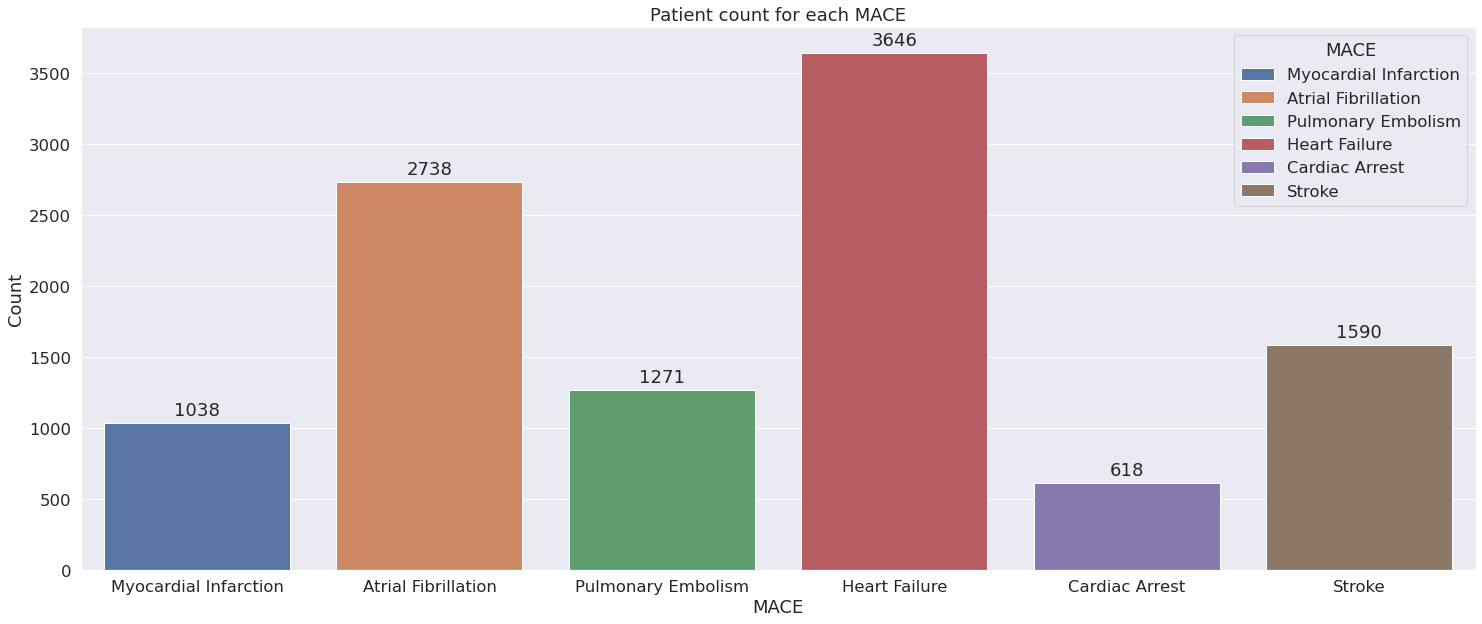

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)
# read a tips.csv file from seaborn library
#df_MACE = pd.melt(subset)

#df_MACE.loc[df_MACE['value']!="0"]
plt.figure(figsize=(25,10))
# count plot on single categorical variable
ax = sns.countplot(x ='MACE', data = df_MACE ,  hue='MACE',dodge=False)
ax.set(title='Patient count for each MACE')
ax.set(xlabel='MACE', ylabel='Count')
for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+50, # y-coordinate position of data label, padded 100 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center
plt.savefig("MACE_Distribution2.png", dpi=300)
# Show the plot
plt.show()

In [45]:
df_final['Myocardial_Infarction_in5year'].value_counts()

0    17266
1     1038
Name: Myocardial_Infarction_in5year, dtype: int64

In [46]:
df_final['atrial_fibrillation_in5year'].value_counts()

0    15566
1     2738
Name: atrial_fibrillation_in5year, dtype: int64

In [47]:
df_final['pulmonary_embolism_in5year'].value_counts()

0    17033
1     1271
Name: pulmonary_embolism_in5year, dtype: int64

In [48]:
df_final['heart_failure_in5year'].value_counts()

0    14658
1     3646
Name: heart_failure_in5year, dtype: int64

In [49]:
df_final['cardiac_arrest_in5year'].value_counts()

0    17686
1      618
Name: cardiac_arrest_in5year, dtype: int64

In [50]:
df_final['stroke_in5year'].value_counts()

0    16714
1     1590
Name: stroke_in5year, dtype: int64

In [61]:
#print i

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(i)? (1927283887.py, line 1)

# Experiment Aggregating encounters based on 15 days

In [51]:
patients_encounters.isnull().values.any()

False

In [52]:
patients_encounters

,encounter_id,patid,fst_dt,index_day,stroke_label,cardiac_arrest_label,heart_failure_label,pulmonary_embolism_label,atrial_fibrillation_label,Myocardial_Infarction_label,...,first_lowest,yrdob,gdr_cd,age_at_index,0-30-label,0-365-label,0-1095-label,0-1825-label,day_gap,age_at_encounter
0,560499200082764_2017-06-13,560499200082764,2017-06-13,2017-09-07,0,0,0,0,0,0,...,0,1998,M,19,0,0,0,0,-86,19
1,560499200082764_2017-07-14,560499200082764,2017-07-14,2017-09-07,0,0,0,0,0,0,...,0,1998,M,19,0,0,0,0,-55,19
2,560499200082764_2017-08-22,560499200082764,2017-08-22,2017-09-07,0,0,0,0,0,0,...,0,1998,M,19,0,0,0,0,-16,19
3,560499200082764_2017-09-07,560499200082764,2017-09-07,2017-09-07,0,0,0,0,0,0,...,0,1998,M,19,0,0,0,0,0,19
4,560499200082764_2017-09-26,560499200082764,2017-09-26,2017-09-07,0,0,0,0,0,0,...,0,1998,M,19,0,0,0,0,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968157,560499899999890_2015-02-06,560499899999890,2015-02-06,2008-06-11,0,0,0,1,0,0,...,2010-05-29 00:00:00,1945,M,63,0,0,1,1,2431,70
4968158,560499899999890_2015-02-07,560499899999890,2015-02-07,2008-06-11,0,0,0,1,0,0,...,2010-05-29 00:00:00,1945,M,63,0,0,1,1,2432,70
4968159,560499899999890_2015-02-09,560499899999890,2015-02-09,2008-06-11,0,0,0,1,0,0,...,2010-05-29 00:00:00,1945,M,63,0,0,1,1,2434,70
4968160,560499899999890_2015-02-10,560499899999890,2015-02-10,2008-06-11,0,0,0,1,0,0,...,2010-05-29 00:00:00,1945,M,63,0,0,1,1,2435,70


In [53]:
#bins = [-180, -150, -120, -90, -60, -30, 0]
#Aggregating to the day before index day
# bins = list(range(-6571, 29999,30))
# labels = list(range(-6541, 29999,30))
bins = list(range(-30015, 30000,15))
labels = list(range(-30000,30000,15))
#labels = [-150, -120, -90, -60, -30, 0]
patients_encounters['binned'] = pd.cut(patients_encounters['day_gap'],  bins=bins, labels=labels)
patients_encounters

,encounter_id,patid,fst_dt,index_day,stroke_label,cardiac_arrest_label,heart_failure_label,pulmonary_embolism_label,atrial_fibrillation_label,Myocardial_Infarction_label,...,yrdob,gdr_cd,age_at_index,0-30-label,0-365-label,0-1095-label,0-1825-label,day_gap,age_at_encounter,binned
0,560499200082764_2017-06-13,560499200082764,2017-06-13,2017-09-07,0,0,0,0,0,0,...,1998,M,19,0,0,0,0,-86,19,-75
1,560499200082764_2017-07-14,560499200082764,2017-07-14,2017-09-07,0,0,0,0,0,0,...,1998,M,19,0,0,0,0,-55,19,-45
2,560499200082764_2017-08-22,560499200082764,2017-08-22,2017-09-07,0,0,0,0,0,0,...,1998,M,19,0,0,0,0,-16,19,-15
3,560499200082764_2017-09-07,560499200082764,2017-09-07,2017-09-07,0,0,0,0,0,0,...,1998,M,19,0,0,0,0,0,19,0
4,560499200082764_2017-09-26,560499200082764,2017-09-26,2017-09-07,0,0,0,0,0,0,...,1998,M,19,0,0,0,0,19,19,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968157,560499899999890_2015-02-06,560499899999890,2015-02-06,2008-06-11,0,0,0,1,0,0,...,1945,M,63,0,0,1,1,2431,70,2445
4968158,560499899999890_2015-02-07,560499899999890,2015-02-07,2008-06-11,0,0,0,1,0,0,...,1945,M,63,0,0,1,1,2432,70,2445
4968159,560499899999890_2015-02-09,560499899999890,2015-02-09,2008-06-11,0,0,0,1,0,0,...,1945,M,63,0,0,1,1,2434,70,2445
4968160,560499899999890_2015-02-10,560499899999890,2015-02-10,2008-06-11,0,0,0,1,0,0,...,1945,M,63,0,0,1,1,2435,70,2445


In [65]:
#patients_encounters['agg_date'] = pd.to_datetime(patients_encounters['index_day']) -  pd.to_timedelta( patients_encounters['interval']*30, unit='d')

In [54]:
patients_encounters['agg_date'] = pd.to_datetime(patients_encounters['index_day']) + pd.to_timedelta( patients_encounters['binned'].astype('int'), unit='d')
patients_encounters

,encounter_id,patid,fst_dt,index_day,stroke_label,cardiac_arrest_label,heart_failure_label,pulmonary_embolism_label,atrial_fibrillation_label,Myocardial_Infarction_label,...,gdr_cd,age_at_index,0-30-label,0-365-label,0-1095-label,0-1825-label,day_gap,age_at_encounter,binned,agg_date
0,560499200082764_2017-06-13,560499200082764,2017-06-13,2017-09-07,0,0,0,0,0,0,...,M,19,0,0,0,0,-86,19,-75,2017-06-24
1,560499200082764_2017-07-14,560499200082764,2017-07-14,2017-09-07,0,0,0,0,0,0,...,M,19,0,0,0,0,-55,19,-45,2017-07-24
2,560499200082764_2017-08-22,560499200082764,2017-08-22,2017-09-07,0,0,0,0,0,0,...,M,19,0,0,0,0,-16,19,-15,2017-08-23
3,560499200082764_2017-09-07,560499200082764,2017-09-07,2017-09-07,0,0,0,0,0,0,...,M,19,0,0,0,0,0,19,0,2017-09-07
4,560499200082764_2017-09-26,560499200082764,2017-09-26,2017-09-07,0,0,0,0,0,0,...,M,19,0,0,0,0,19,19,30,2017-10-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968157,560499899999890_2015-02-06,560499899999890,2015-02-06,2008-06-11,0,0,0,1,0,0,...,M,63,0,0,1,1,2431,70,2445,2015-02-20
4968158,560499899999890_2015-02-07,560499899999890,2015-02-07,2008-06-11,0,0,0,1,0,0,...,M,63,0,0,1,1,2432,70,2445,2015-02-20
4968159,560499899999890_2015-02-09,560499899999890,2015-02-09,2008-06-11,0,0,0,1,0,0,...,M,63,0,0,1,1,2434,70,2445,2015-02-20
4968160,560499899999890_2015-02-10,560499899999890,2015-02-10,2008-06-11,0,0,0,1,0,0,...,M,63,0,0,1,1,2435,70,2445,2015-02-20


In [72]:
test = patients_encounters[(patients_encounters.day_gap < 0) &(patients_encounters.day_gap >-15)]
test.patid.nunique()

15620

In [74]:
patients_encounters[(patients_encounters.patid == 560499200154057)&(patients_encounters.day_gap <= -15) &(patients_encounters.day_gap >-31 )]

,encounter_id,patid,fst_dt,index_day,stroke_label,cardiac_arrest_label,heart_failure_label,pulmonary_embolism_label,atrial_fibrillation_label,Myocardial_Infarction_label,...,gdr_cd,age_at_index,0-30-label,0-365-label,0-1095-label,0-1825-label,day_gap,age_at_encounter,binned,agg_date
64,560499200154057_2019-10-09,560499200154057,2019-10-09,2019-11-04,0,0,0,0,0,0,...,M,59,0,0,0,0,-26,59,-15,2019-10-20
65,560499200154057_2019-10-18,560499200154057,2019-10-18,2019-11-04,0,0,0,0,0,0,...,M,59,0,0,0,0,-17,59,-15,2019-10-20


In [55]:
patients_encounters.to_csv(ot_path+"patients_encounters_15_V3.csv", index=False)

In [ ]:
patients_encounters.info()

# Some patients doesn't have any encounters before the index date

In [ ]:
patients_3years = patients_encounters[(patients_encounters.fst_dt < patients_encounters.index_day) & (patients_encounters.day_gap < 0) & 
                                      (patients_encounters.day_gap >= -1095) & (patients_encounters.mixed !=0) ]

# 0-30

In [ ]:
num_0_30= patients_3years[(patients_3years['0-30-label'] == 1) ].patid.nunique()

print("Total number of cases in the interval [0-30]is: ", num_0_30 )
print("Total number of controls in the interval [0-30]is: ", 18304-num_0_30 )

# 0-365

In [ ]:
num_0_365 = patients_3years[patients_3years['0-365-label']== 1].patid.nunique()
print("Total number of cases in the interval [0-365]is: ", num_0_365 )
print("Total number of controls in the interval [0-30]is: ", 18304-num_0_365 )

# 0-1095

In [ ]:
num_0_1095 = patients_3years[patients_3years['0-1095-label']== 1].patid.nunique()
print("Total number of cases in the interval [0-1095]is: ", num_0_1095)
print("Total number of controls in the interval [0-1095]is: ", 18304- num_0_1095 )

# 0-1825

In [ ]:
num_0_1825 = patients_3years[patients_3years['0-1825-label']== 1].patid.nunique()
print("Total number of cases in the interval [0-1825]is: ", num_0_1825)
print("Total number of controls in the interval [0-1825]is: ", 18304- num_0_1825 )

# Some Plots

In [ ]:
#options_list = ["0 - 30 days", "0 - 365 days", "0 - 1095 days", "0 - 1825 days"]
options_list = ["0 - 30 days", "0 - 1 year", "0 - 3 years", "0 - 5 years"]
cases_list = [ 2617, 4972, 6084, 6461]
controls_list = [ 15687, 13332, 12220, 11843]

In [ ]:
scenarios_df = pd.DataFrame(
    {'Scenario': options_list,
     'MACE': cases_list,
     'NO-MACE':controls_list 
    })
scenarios_df

In [ ]:
s_df = scenarios_df.melt('Scenario')
s_df

In [ ]:
s_df =s_df.rename(columns={'variable': 'Class'}) 

In [ ]:
plt.figure(figsize=(25, 15))
sns.set(font_scale=2)
splot = sns.barplot(x="Scenario", y="value", hue="Class", data=s_df, palette = ['tab:red', 'tab:blue','tab:orange', 'tab:green'])
plt.xlabel("Prediction Intervals")
plt.ylabel("Number of Patients")
plt.title("MACE/NO_MACE Patient Count for Each Testing Scenario", size=18)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, 12), 
                   textcoords = 'offset points')
#plt.savefig('Annotating_MACE_NOMACE.png',dpi=300)
plt.savefig('Annotating_MACE_NOMACE2.png',dpi=600)

In [ ]:
# X = np.arange(len(selected_list))

# plt.plot(class_ratio["ischemic"], "--o", label="Ischemic Event Prediction", color="lightskyblue")
# plt.plot(class_ratio["bleeding"], "--o", label="Bleeding Event Prediction", color="lightsalmon")

# plt.xticks(X, ["8 - 182 days", "183 - 365 days", "366 - 548 days", "549 - 730 days", "731 - 913 days", "914 - 1095 days"], rotation=30)
# plt.ylim((0,max(max(class_ratio["ischemic"], class_ratio["bleeding"]))*1.2))
# plt.legend(loc="upper left")

# for x,y in zip(X,class_ratio["ischemic"]):
#     label = "{}:1".format(y)
#     plt.annotate(label, # this is the text
#                  (x,y), # these are the coordinates to position the label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,10), # distance from text to points (x,y)
#                  ha='center') # horizontal alignment can be left, right or center

# for x,y in zip(X,class_ratio["bleeding"]):
#     label = "{}:1".format(y)
#     plt.annotate(label, # this is the text
#                  (x,y), # these are the coordinates to position the label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,10), # distance from text to points (x,y)
#                  ha='center') # horizontal alignment can be left, right or center
# plt.title("Class Ratio for Each Prediction Window (Negative to Positive)\n", fontsize = 13)

# plt.grid()
# plt.show()